In [1]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import random

In [2]:
train_d = datasets.MNIST(root= 'data',train=True,transform=ToTensor(),download=True)
test_d = datasets.MNIST(root= 'data',train=False,transform=ToTensor(),download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 162298613.58it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 48629343.16it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 29716500.29it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 23606603.18it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
train_d.data.shape

torch.Size([60000, 28, 28])

In [4]:
test_d.data.shape

torch.Size([10000, 28, 28])

In [5]:
train_d.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [6]:

loaders={'train': DataLoader(train_d,
                             batch_size=100,
                             shuffle=True,
                             num_workers=1),
            'test': DataLoader(test_d,
                            batch_size=100,
                            shuffle=True,
                            num_workers=1)}

In [7]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7f10523fbcd0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7f10522299f0>}

In [8]:
class NN(nn.Module):
    def __init__(self):
            super(NN, self).__init__()
            self.conv1 = nn.Conv2d(1,10, kernel_size=5)
            self.conv2 = nn.Conv2d(10,20, kernel_size=5)
            self.conv2_drop =nn.Dropout2d()
            self.fc1= nn.Linear(320,50)
            self.fc2=nn.Linear(50,10)
    def forward(self,x):
        x=F.relu(F.max_pool2d(self.conv1(x),2))
        x=F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
        x= x.view(-1,320)
        x=F.relu(self.fc1(x))
        x=F.dropout(x,training =self.training)
        x=self.fc2(x)
        return F.softmax(x)
                 
        

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = NN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} ({100. * batch_idx / len(loaders["train"]):.0f}%)]\t{loss.item():.6f}')

def test():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(loaders['test'].dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(loaders["test"].dataset)} ({100. * correct / len(loaders["test"].dataset):.0f}%)\n')


In [10]:

for epoch in range(1, 11):
    train(epoch)
    test()


/tmp/ipykernel_27/949544416.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	2.302773
Train Epoch: 1 [2000/60000 (3%)]	2.080512
Train Epoch: 1 [4000/60000 (7%)]	2.083523
Train Epoch: 1 [6000/60000 (10%)]	2.018705
Train Epoch: 1 [8000/60000 (13%)]	1.936388
Train Epoch: 1 [10000/60000 (17%)]	1.776307
Train Epoch: 1 [12000/60000 (20%)]	1.849067
Train Epoch: 1 [14000/60000 (23%)]	1.741395
Train Epoch: 1 [16000/60000 (27%)]	1.813480
Train Epoch: 1 [18000/60000 (30%)]	1.744793
Train Epoch: 1 [20000/60000 (33%)]	1.802692
Train Epoch: 1 [22000/60000 (37%)]	1.730210
Train Epoch: 1 [24000/60000 (40%)]	1.720422
Train Epoch: 1 [26000/60000 (43%)]	1.761219
Train Epoch: 1 [28000/60000 (47%)]	1.730618
Train Epoch: 1 [30000/60000 (50%)]	1.761922
Train Epoch: 1 [32000/60000 (53%)]	1.711973
Train Epoch: 1 [34000/60000 (57%)]	1.752469
Train Epoch: 1 [36000/60000 (60%)]	1.690546
Train Epoch: 1 [38000/60000 (63%)]	1.647815
Train Epoch: 1 [40000/60000 (67%)]	1.680910
Train Epoch: 1 [42000/60000 (70%)]	1.677477
Train Epoch: 1 [44000/60000 (73%)]	1.765845

Prediction: 0, True Value: 0


/tmp/ipykernel_27/949544416.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


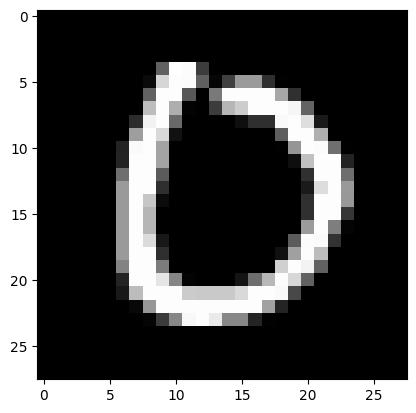

Prediction: 9, True Value: 9


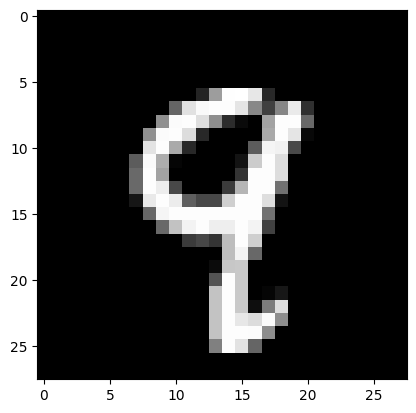

Prediction: 4, True Value: 4


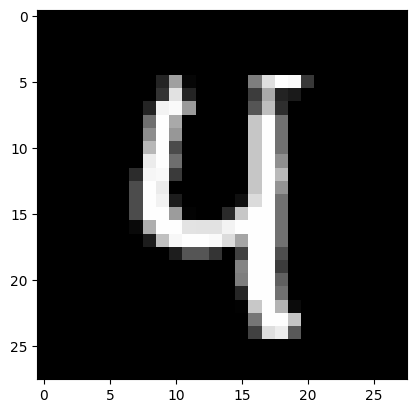

Prediction: 4, True Value: 4


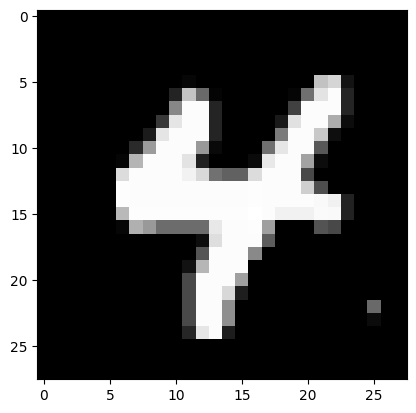

Prediction: 2, True Value: 2


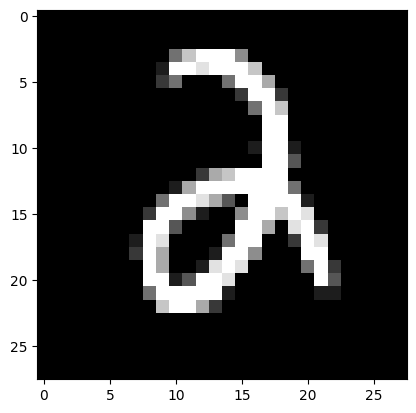

In [11]:
import matplotlib.pyplot as plt
model.eval()
for _ in range(5):
    r_index = random.randint(0, len(test_d) - 1)
    data, target = test_d[r_index]
    data = data.unsqueeze(0).to(device)
    output = model(data)
    prediction = output.argmax(dim=1, keepdim=True).item()
    label = target

    print(f'Prediction: {prediction}, True Value: {label}')
    image = data.squeeze(0).squeeze(0).cpu().numpy()
    plt.imshow(image, cmap='gray')
    plt.show()

